# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#mounting google drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#Loading data and cheking five rows 
df_car=pd.read_csv("/content/drive/MyDrive/CarPrice_Assignment.csv")
df_car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
X=df_car.iloc[:,:-1]
y=df_car.iloc[:,-1]

In [7]:
X.drop(X.select_dtypes(include='object'),axis=1,inplace=True)

In [8]:
print(f"Shape of input ==> X :{X.shape}\nShape of output ==> Y :{y.shape} ")

Shape of input ==> X :(205, 15)
Shape of output ==> Y :(205,) 


In [9]:
X_train=X.sample(frac=0.7, replace=True, random_state=1,axis=0)
y_train=y.sample(frac=0.7, replace=True, random_state=1,axis=0)

In [10]:
X_test=X.sample(frac=0.3, replace=True, random_state=1,axis=0)
y_test=y.sample(frac=0.3, replace=True, random_state=1,axis=0)

In [11]:
print(f"shape of training data is :{X_train.shape}\nshape of training label is :{y_train.shape}\nshape of testing data is :{X_test.shape}\nshape of testing label is :{y_test.shape}")

shape of training data is :(144, 15)
shape of training label is :(144,)
shape of testing data is :(62, 15)
shape of testing label is :(62,)


In [12]:
X_train=np.asarray(X_train).astype("float32")
X_test=np.asarray(X_test).astype("float32")

In [13]:
mean = X_train.mean(axis=0)
X_train-= mean
std = X_train.std(axis=0)
X_train/= std
X_test-= mean
X_test/= std

In [14]:
y_mean = y_train.mean(axis=0)
y_train-= y_mean
y_std = y_train.std(axis=0)
y_train/= y_std
y_test-= y_mean
y_test/= y_std

In [15]:
val_x=X_train[:50]
partial_x_train=X_train[50:]
val_y=y_train[:50]
partial_y_train=y_train[50:]

In [16]:
import tensorflow as tf
from keras import models,layers,optimizers,losses
network=models.Sequential()
network.add(layers.Dense(10,activation="relu" ,input_shape=(X_train.shape[1],)))
network.add(layers.Dropout(0.2))
network.add(layers.Dense(8,activation="relu"))
#network.add(layers.Dropout(0.2))
network.add(layers.Dense(6,activation="relu"))
network.add(layers.Dense(1))
network.compile(optimizer="rmsprop",loss="mse",metrics=["mae"])

In [17]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                160       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 309
Trainable params: 309
Non-trainable params: 0
_________________________________________________________________


In [18]:
history=network.fit(partial_x_train, partial_y_train,epochs=45, batch_size=1, verbose=1,validation_data=(val_x,val_y))

Epoch 1/45
94/94 [==============================] - 1s 5ms/step - loss: 4.5334 - mae: 1.7059 - val_loss: 1.6147 - val_mae: 0.9564
Epoch 2/45
94/94 [==============================] - 0s 1ms/step - loss: 0.8078 - mae: 0.7333 - val_loss: 0.9470 - val_mae: 0.7672
Epoch 3/45
94/94 [==============================] - 0s 1ms/step - loss: 0.4679 - mae: 0.5366 - val_loss: 0.7159 - val_mae: 0.6826
Epoch 4/45
94/94 [==============================] - 0s 2ms/step - loss: 0.5042 - mae: 0.5948 - val_loss: 0.6292 - val_mae: 0.6498
Epoch 5/45
94/94 [==============================] - 0s 2ms/step - loss: 0.4471 - mae: 0.5570 - val_loss: 0.5453 - val_mae: 0.5998
Epoch 6/45
94/94 [==============================] - 0s 2ms/step - loss: 0.5022 - mae: 0.5349 - val_loss: 0.4700 - val_mae: 0.5538
Epoch 7/45
94/94 [==============================] - 0s 2ms/step - loss: 0.3552 - mae: 0.4564 - val_loss: 0.4711 - val_mae: 0.5540
Epoch 8/45
94/94 [==============================] - 0s 2ms/step - loss: 0.2539 - mae: 0.41

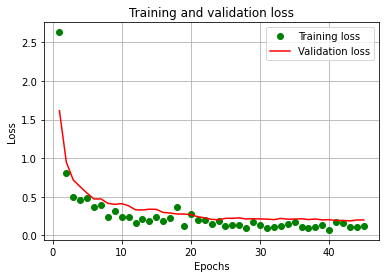

In [19]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss,"go",label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [20]:
network.evaluate(X_test,y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.1749 - mae: 0.2627


[0.17486520111560822, 0.26269352436065674]

In [21]:
result_1=network.predict(X_test)
result_1[4]

array([0.7847265], dtype=float32)

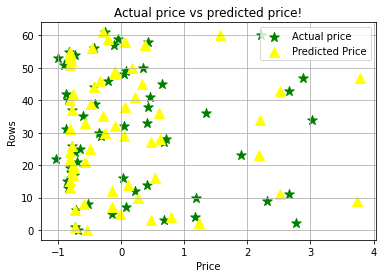

In [22]:
y=result_1
y1=range(62)
x=y_test
plt.scatter(x, y1, label= "Actual price", color= "green", marker= "*", s=100)
plt.scatter(y, y1, label= "Predicted Price", color= "yellow", marker= "^", s=100)
plt.xlabel('Price')
plt.ylabel('Rows')
plt.title('Actual price vs predicted price!')
plt.legend()
plt.grid()
plt.show()